# Odd-Even MPI Weak Scaling Anaylisis

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("/scratch/user/riley.szecsy/FinalProject/MPI/Odd-EvenSort/CaliFiles//*.cali"))
tk.dataframe = tk.dataframe.drop(["spot.channel"], axis=1)
tk.dataframe = tk.dataframe.drop(["Min time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Max time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["Total time"],axis=1)
tk.dataframe = tk.dataframe.drop(["Variance time/rank"],axis=1)
tk.dataframe = tk.dataframe.drop(["nid"],axis=1)

In [3]:
# Performance data
tk.dataframe

Avg time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              5483084         14.360718   
                                                  10341062         0.583057   
                                                  25019965         2.107855   
                                                  41578903         4.122546   
                                                  55064629         3.777966   
                                                  66037327         1.377603   
                                                  66648127         2.005319   
                                                  72663257         2.285582   
                                                  116519970       26.108971   
                                                  127784059        3.222216   
                                                  137943328       17.894742   
                                                  181919278        0.477218   
                                                  185280473        2.904230   
                                                  230675780        3.788698   
                                                  253517045        4.730507   
                                                  256027839        3.935422   
                                                  258680219        0.372019   
                                                  262563229        1.726005   
                                                  269557108        0.814218   
                                                  282096026        0.769289   
                                                  296243770        0.853014   
                                                  296987390        1.498520   
                                                  307496019        0.728392   
                                                  366751633        3.876627   
                                                  392543622        2.075056   
                                                  404647651        1.395362   
                                                  409157698        2.226735   
                                                  418808302        4.271405   
                                                  477492247        0.956236   
                                                  492731890        1.827025   
                                                  506687908        2.030156   
                                                  510000938        3.654587   
                                                  512666979        0.648305   
                                                  513122203       27.579499   
                                                  528960643        2.769196   
                                                  532664040        2.629785   
                                                  572665415        0.656094   
                                                  575628522        1.757653   
                                                  578244390        0.977236   
                                                  586104248        1.683208   
                                                  589101846        1.081856   
                                                  619216921        0.765305   
                                                  645656272        8.244586   
                                                  649869591        4.189951   
                                                  652410820        2.774010   
                                                  667445678        7.494898   
                                                  700529678        8.317620   
                                                  711704166        1.345052   
                                                  713584169        3.845476   
                                 

In [4]:
#Printing Thicket Tree
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
└─ 1.000 whole_computation
   ├─ 1.000 check_correctness
   ├─ 1.000 comm
   │  └─ 1.000 comm_large
   │     ├─ 1.000 MPI_Gather
   │     ├─ 1.000 MPI_Recv
   │     ├─ 1.000 MPI_Scatter
   │     └─ 1.000 MPI_Send
   ├─ 1.000 comp
   │  └─ 1.000 comp_large
   └─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
5483084              2.11.0-dev             128   
10341062             2.11.0-dev               4   
25019965             2.11.0-dev             256   
41578903             2.11.0-dev              64   
55064629             2.11.0-dev            1024   
66037327             2.11.0-dev              64   
66648127             2.11.0-dev              32   
72663257             2.11.0-dev             512   
116519970            2.11.0-dev               4   
127784059            2.11.0-dev              32   
137943328            2.11.0-dev               8   
181919278            2.11.0-dev               8   
185280473            2.11.0-dev               8   
230675780            2.11.0-dev            1024   
253517045            2.11.0-dev             512   
256027839            2.11.0-dev            1024   
258680219            2.11.0-dev               4   
262563229            2.11.0-dev              64   
269557108            2.11.0-dev              16   
282096026            2.11.0-dev              16   
296243770            2.11.0-dev              16   
296987390            2.11.0-dev             128   
307496019            2.11.0-dev               8   
366751633            2.11.0-dev            1024   
392543622            2.11.0-dev              64   
404647651            2.11.0-dev              32   
409157698            2.11.0-dev               2   
418808302            2.11.0-dev             256   
477492247            2.11.0-dev              16   
492731890            2.11.0-dev             128   
506687908            2.11.0-dev             256   
510000938            2.11.0-dev            1024   
512666979            2.11.0-dev               8   
513122203            2.11.0-dev               2   
528960643            2.11.0-dev             256   
532664040            2.11.0-dev              16   
572665415            2.11.0-dev               8   
575628522            2.11.0-dev             256   
578244390            2.11.0-dev               8   
586104248            2.11.0-dev             256   
589101846            2.11.0-dev               8   
619216921            2.11.0-dev              16   
645656272            2.11.0-dev            1024   
649869591            2.11.0-dev            1024   
652410820            2.11.0-dev              64   
667445678            2.11.0-dev               2   
700529678            2.11.0-dev              16   
711704166            2.11.0-dev              32   
713584169            2.11.0-dev            1024   
734800795            2.11.0-dev              16   
766695078            2.11.0-dev             256   
777172847            2.11.0-dev             512   
794531183            2.11.0-dev               4   
858224435            2.11.0-dev               4   
894611623            2.11.0-dev              32   
907620808            2.11.0-dev               8   
923536658            2.11.0-dev             128   
943713406            2.11.0-dev               4   
971664067            2.11.0-dev            1024   
972108397            2.11.0-dev              64   
984079631            2.11.0-dev               8   
994934992            2.11.0-dev              64   
997720791            2.11.0-dev               4   
1002738337           2.11.0-dev              32   
1004801919           2.11.0-dev             128   
1027986172           2.11.0-dev            1024   
1032200397           2.11.0-dev              16   
1039971687           2.11.0-dev              64   
1054086310           2.11.0-dev            1024   
1054888724           2.11.0-dev             128   
1102212298           2.11.0-dev            1024   
1124550345           2.11.0-dev             128   
1183657221           2.11.0-dev               4   
1189961803           2.11.0-dev             512   
1204707739           2.11.0-dev               2   
1233815245           2.11.0-dev              32   
1248236766           2.11.0-dev  

In [6]:
gb = tk.groupby(["InputType", "InputSize"])

28  thickets created...
{('1%%perturbed', 65536): <thicket.thicket.Thicket object at 0x2affcc322580>, ('1%%perturbed', 262144): <thicket.thicket.Thicket object at 0x2affcc242a00>, ('1%%perturbed', 1048576): <thicket.thicket.Thicket object at 0x2affa7b09130>, ('1%%perturbed', 4194304): <thicket.thicket.Thicket object at 0x2affcc3f97f0>, ('1%%perturbed', 16777216): <thicket.thicket.Thicket object at 0x2affcc44bac0>, ('1%%perturbed', 67108864): <thicket.thicket.Thicket object at 0x2affcc3c7d60>, ('1%%perturbed', 268435456): <thicket.thicket.Thicket object at 0x2affcc3cd430>, ('Random', 65536): <thicket.thicket.Thicket object at 0x2affcc37ad30>, ('Random', 262144): <thicket.thicket.Thicket object at 0x2affcc2e4eb0>, ('Random', 1048576): <thicket.thicket.Thicket object at 0x2affcc42fc40>, ('Random', 4194304): <thicket.thicket.Thicket object at 0x2affcc344b80>, ('Random', 16777216): <thicket.thicket.Thicket object at 0x2affcc2e4e80>, ('Random', 67108864): <thicket.thicket.Thicket object at 0

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [8]:
ctk.dataframe

(1%%perturbed, 65536)  \
                                                                    Avg time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.596186   
                                                  4                      0.379166   
                                                  8                      2.633990   
                                                  16                     0.776396   
                                                  32                     1.433996   
                                                  64                     1.758034   
                                                  128                    1.917054   
                                                  256                    1.860386   
                                                  512                    2.405749   
                                                  1024                   3.845476   
{'name': 'whole_computation', 'type': 'function'} 2                      0.009014   
                                                  4                      0.005381   
                                                  8                      0.013052   
                                                  16                     0.008055   
                                                  32                     0.055733   
                                                  64                     0.030749   
                                                  128                    0.076449   
                                                  256                    0.071774   
                                                  512                    0.136486   
                                                  1024                   0.295999   
{'name': 'check_correctness', 'type': 'function'} 2                      0.000209   
                                                  4                      0.000187   
                                                  8                      0.000174   
                                                  16                     0.000186   
                                                  32                     0.000186   
                                                  64                     0.000178   
                                                  128                    0.000177   
                                                  256                    0.000179   
                                                  512                    0.000178   
                                                  1024                   0.000175   
{'name': 'comm', 'type': 'function'}              2                      0.003141   
                                                  4                      0.001725   
                                                  8                      0.009888   
                                                  16                     0.005155   
                                                  32                     0.053041   
                                                  64                     0.027624   
                                                  128                    0.072562   
                                                  256                    0.066439   
                                                  512                    0.128007   
                                                  1024                   0.281029   
{'name': 'comm_large', 'type': 'function'}        2                      0.003102   
                                                  4                      0.001665   
                                                  8                      0.009776   
                                                  16                     0.004955   
                                                  32             

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
# Drop unwanted columns
#ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (("1%%perturbed",65536), "nid"), (("1%%perturbed",65536),"Min time/rank"), (("1%%perturbed",65536),"Max time/rank"), (("1%%perturbed",65536),"Total time"), (("1%%perturbed",65536),"Variance time/rank"), (("Random",65536),"nid"), (("Random",65536),"Min time/rank"), (("Random",65536),"Max time/rank"), (("Random",65536),"Total time"), (("Random",65536),"Variance time/rank"),(("Sorted",65536),"nid"),(("Sorted",65536),"Min time/rank"), (("Sorted",65536),"Max time/rank"), (("Sorted",65536),"Total time"), (("Sorted",65536),"Variance time/rank"),(("ReverseSorted",65536),"nid"),(("ReverseSorted",65536),"Min time/rank"), (("ReverseSorted",65536),"Max time/rank"), (("ReverseSorted",65536),"Total time"), (("ReverseSorted",65536),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",262144), "nid"), (("1%%perturbed",262144),"Min time/rank"), (("1%%perturbed",262144),"Max time/rank"), (("1%%perturbed",262144),"Total time"), (("1%%perturbed",262144),"Variance time/rank"), (("Random",262144),"nid"), (("Random",262144),"Min time/rank"), (("Random",262144),"Max time/rank"), (("Random",262144),"Total time"), (("Random",262144),"Variance time/rank"),(("Sorted",262144),"nid"),(("Sorted",262144),"Min time/rank"), (("Sorted",262144),"Max time/rank"), (("Sorted",262144),"Total time"), (("Sorted",262144),"Variance time/rank"),(("ReverseSorted",262144),"nid"),(("ReverseSorted",262144),"Min time/rank"), (("ReverseSorted",262144),"Max time/rank"), (("ReverseSorted",262144),"Total time"), (("ReverseSorted",262144),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.reset_index().drop([(("1%%perturbed",1048576), "nid"), (("1%%perturbed",1048576),"Min time/rank"), (("1%%perturbed",1048576),"Max time/rank"), (("1%%perturbed",1048576),"Total time"), (("1%%perturbed",1048576),"Variance time/rank"), (("Random",1048576),"nid"), (("Random",1048576),"Min time/rank"), (("Random",1048576),"Max time/rank"), (("Random",1048576),"Total time"), (("Random",1048576),"Variance time/rank"),(("Sorted",1048576),"nid"),(("Sorted",1048576),"Min time/rank"), (("Sorted",1048576),"Max time/rank"), (("Sorted",1048576),"Total time"), (("Sorted",1048576),"Variance time/rank"),(("ReverseSorted",1048576),"nid"),(("ReverseSorted",1048576),"Min time/rank"), (("ReverseSorted",1048576),"Max time/rank"), (("ReverseSorted",1048576),"Total time"), (("ReverseSorted",1048576),"Variance time/rank") ], axis=1)
#ctk.dataframe = ctk.dataframe.drop([("index","")], axis=1)

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [10]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.596186               0.612037   
                  4                      0.379166               0.389464   
                  8                      2.633990               0.503474   
                  16                     0.776396               0.804248   
                  32                     1.433996               1.451457   
                  64                     1.758034               1.726005   
                  128                    1.917054               2.039742   
                  256                    1.860386               1.736576   
                  512                    2.405749               2.285582   
                  1024                   3.845476               3.782143   
whole_computation 2                      0.009014               0.028852   
                  4                      0.005381               0.021298   
                  8                      0.013052               0.015692   
                  16                     0.008055               0.014954   
                  32                     0.055733               0.059867   
                  64                     0.030749               0.027871   
                  128                    0.076449               0.062510   
                  256                    0.071774               0.097897   
                  512                    0.136486               0.143477   
                  1024                   0.295999               0.352210   
check_correctness 2                      0.000209               0.000681   
                  4                      0.000187               0.000675   
                  8                      0.000174               0.000702   
                  16                     0.000186               0.000687   
                  32                     0.000186               0.000709   
                  64                     0.000178               0.000696   
                  128                    0.000177               0.000696   
                  256                    0.000179               0.000696   
                  512                    0.000178               0.000711   
                  1024                   0.000175               0.000705   
comm              2                      0.003141               0.006047   
                  4                      0.001725               0.005559   
                  8                      0.009888               0.004095   
                  16                     0.005155               0.004417   
                  32                     0.053041               0.050528   
                  64                     0.027624               0.018396   
                  128                    0.072562               0.052135   
                  256                    0.066439               0.086574   
                  512                    0.128007               0.128875   
                  1024                   0.281029               0.330228   
comm_large        2                      0.003102               0.006007   
                  4                      0.001665               0.005492   
                  8                      0.009776               0.003988   
                  16                     0.004955               0.004221   
                  32                     0.052639               0.050145   
                  64                     0.026892               0.017662   
                  128                    0.071117               0.050691   
                  256                    0.063576               0.083708   
                  512                    0.122302               0.123160   
                  1024                   0.269643               0.318831   


In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
inputsizes = sorted(list(set(tk.metadata["InputSize"].to_list())))
inputtypes = sorted(list(set(tk.metadata["InputType"].to_list())))

In [12]:
ctk.dataframe

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                                    Avg time/rank          Avg time/rank   
name              num_procs                                                
main              2                      0.596186               0.612037   
                  4                      0.379166               0.389464   
                  8                      2.633990               0.503474   
                  16                     0.776396               0.804248   
                  32                     1.433996               1.451457   
                  64                     1.758034               1.726005   
                  128                    1.917054               2.039742   
                  256                    1.860386               1.736576   
                  512                    2.405749               2.285582   
                  1024                   3.845476               3.782143   
whole_computation 2                      0.009014               0.028852   
                  4                      0.005381               0.021298   
                  8                      0.013052               0.015692   
                  16                     0.008055               0.014954   
                  32                     0.055733               0.059867   
                  64                     0.030749               0.027871   
                  128                    0.076449               0.062510   
                  256                    0.071774               0.097897   
                  512                    0.136486               0.143477   
                  1024                   0.295999               0.352210   
check_correctness 2                      0.000209               0.000681   
                  4                      0.000187               0.000675   
                  8                      0.000174               0.000702   
                  16                     0.000186               0.000687   
                  32                     0.000186               0.000709   
                  64                     0.000178               0.000696   
                  128                    0.000177               0.000696   
                  256                    0.000179               0.000696   
                  512                    0.000178               0.000711   
                  1024                   0.000175               0.000705   
comm              2                      0.003141               0.006047   
                  4                      0.001725               0.005559   
                  8                      0.009888               0.004095   
                  16                     0.005155               0.004417   
                  32                     0.053041               0.050528   
                  64                     0.027624               0.018396   
                  128                    0.072562               0.052135   
                  256                    0.066439               0.086574   
                  512                    0.128007               0.128875   
                  1024                   0.281029               0.330228   
comm_large        2                      0.003102               0.006007   
                  4                      0.001665               0.005492   
                  8                      0.009776               0.003988   
                  16                     0.004955               0.004221   
                  32                     0.052639               0.050145   
                  64                     0.026892               0.017662   
                  128                    0.071117               0.050691   
                  256                    0.063576               0.083708   
                  512                    0.122302               0.123160   
                  1024                   0.269643               0.318831   


# Plotting (From the lab 1 example)

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=2)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Graphs

In [16]:
ctk.dataframe.loc["main"]

(1%%perturbed, 65536) (1%%perturbed, 262144)  \
                  Avg time/rank          Avg time/rank   
num_procs                                                
2                      0.596186               0.612037   
4                      0.379166               0.389464   
8                      2.633990               0.503474   
16                     0.776396               0.804248   
32                     1.433996               1.451457   
64                     1.758034               1.726005   
128                    1.917054               2.039742   
256                    1.860386               1.736576   
512                    2.405749               2.285582   
1024                   3.845476               3.782143   

          (1%%perturbed, 1048576) (1%%perturbed, 4194304)  \
                    Avg time/rank           Avg time/rank   
num_procs                                                   
2                             NaN                0.669275   
4                        0.424809                0.653009   
8                        0.656094                0.704019   
16                       0.788431                0.941264   
32                       1.395362                1.594166   
64                       1.398204                1.513374   
128                      1.520119                1.660054   
256                      1.708796                1.823438   
512                      2.287086                2.354366   
1024                     3.355063                3.369849   

          (1%%perturbed, 16777216) (1%%perturbed, 67108864)  \
                     Avg time/rank            Avg time/rank   
num_procs                                                     
2                         2.226735                 7.494898   
4                         1.599636                 5.457427   
8                         1.397305                 4.255636   
16                        1.543065                 3.897077   
32                        2.048016                 4.193644   
64                        2.050488                 4.122546   
128                       2.121761                 4.444017   
256                       2.330761                 4.271405   
512                       2.866495                 4.730507   
1024                      3.876627                 5.736453   

          (1%%perturbed, 268435456) (Random, 65536) (Random, 262144)  \
                      Avg time/rank   Avg time/rank    Avg time/rank   
num_procs                                                              
2                         30.918978        1.246836         0.526360   
4                         21.658108        0.725225         0.609247   
8                         16.054857        0.477218         0.484863   
16                        15.118704        0.774327         0.751450   
32                        12.969775        1.727702         1.371001   
64                        12.357499        1.358665         1.743112   
128                       14.360718        2.262286         1.498520   
256                       12.280327        2.148862         1.732906   
512                       13.446261        2.635771         2.656981   
1024                      13.585872        3.788698         6.130260   

          (Random, 1048576) (Random, 4194304) (Random, 16777216)  \
              Avg time/rank     Avg time/rank      Avg time/rank   
num_procs                                                          
2                  0.627163          1.061684           2.668352   
4                  0.450281          0.720597           1.880321   
8                  0.539783          0.977236           1.532131   
16                 0.780438          0.956236           1.577740   
32                 1.371612          1.493925                NaN   
64                 1.377603          1.906572           2.029648   
128                1.510896          1.645902           2.385840   
256                2.163

In [19]:
#Weak Scaling

/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


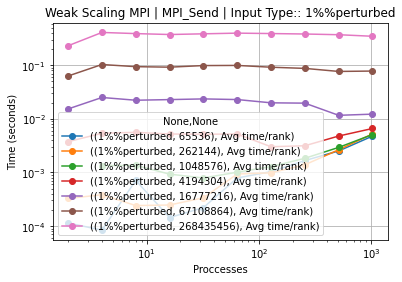

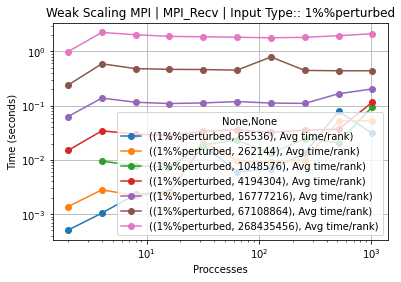

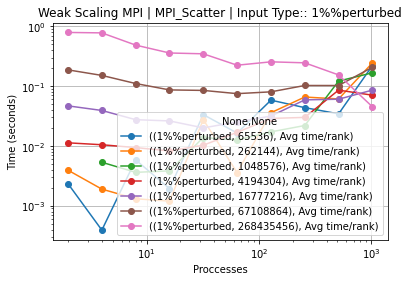

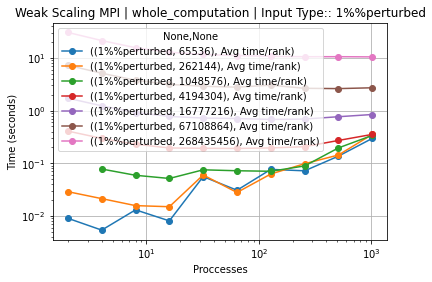

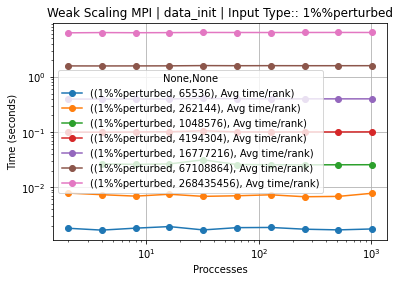

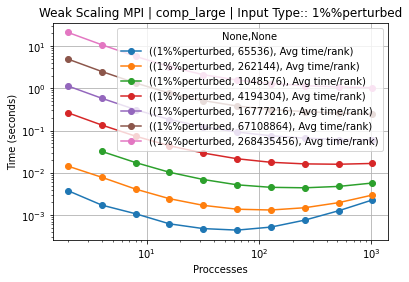

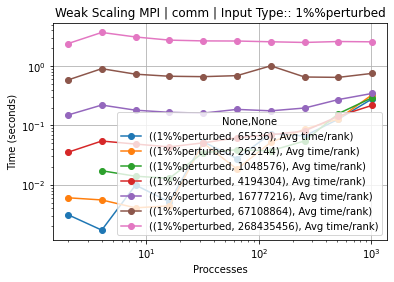

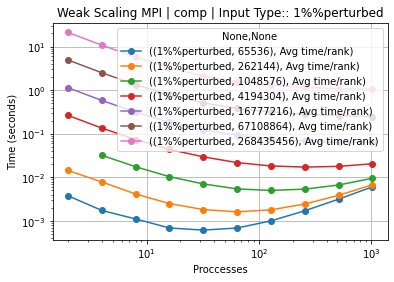

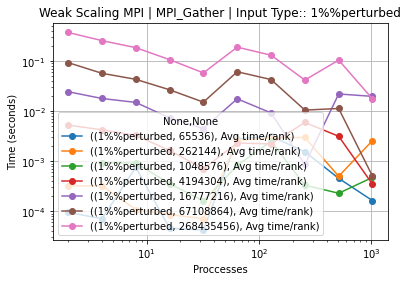

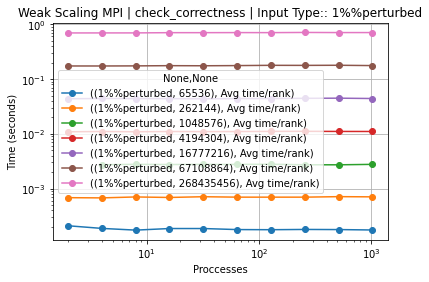

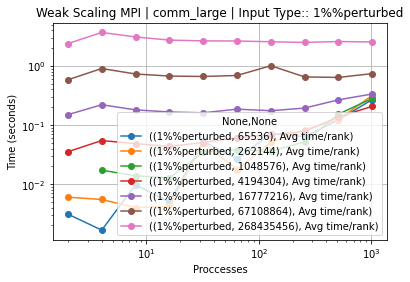

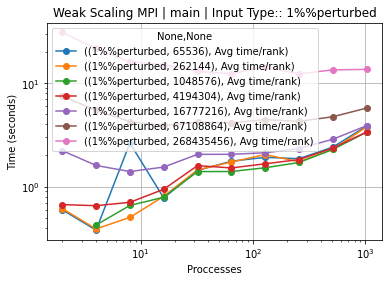

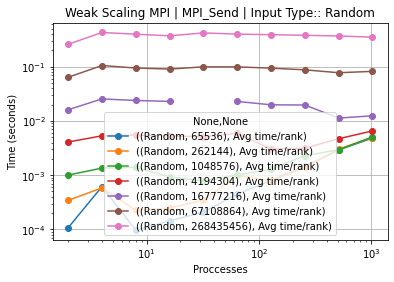

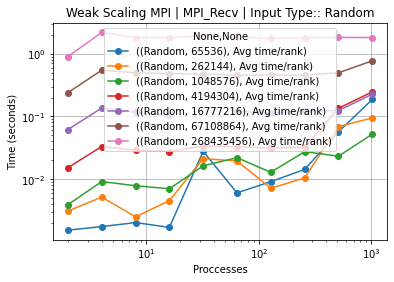

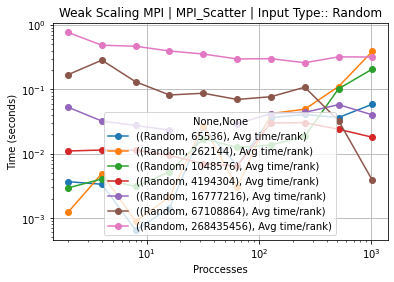

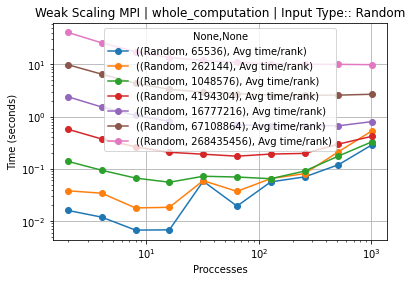

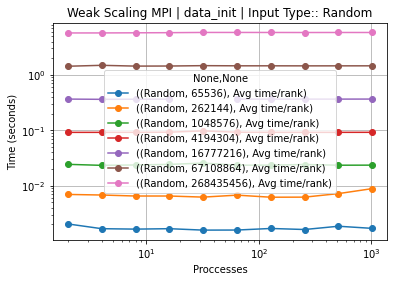

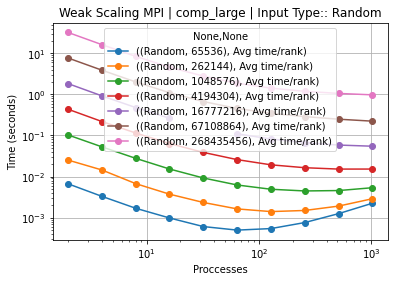

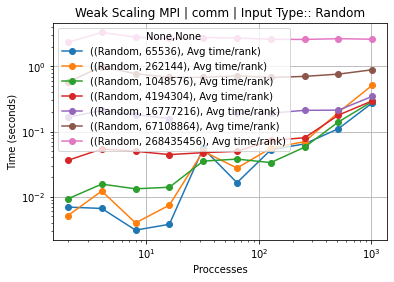

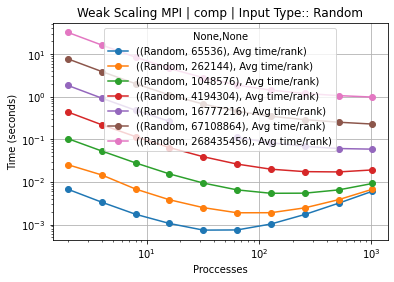

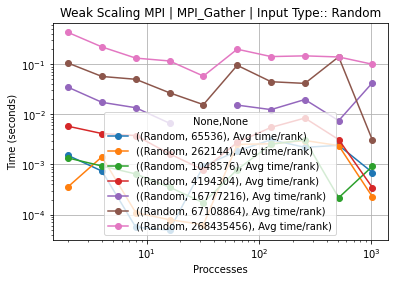

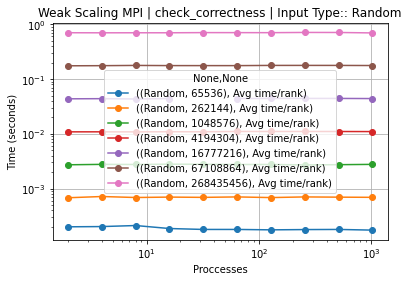

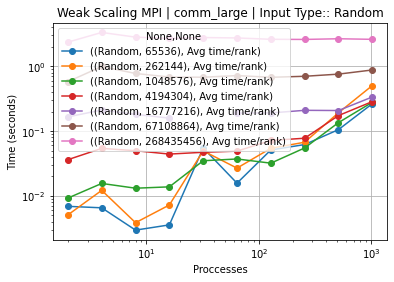

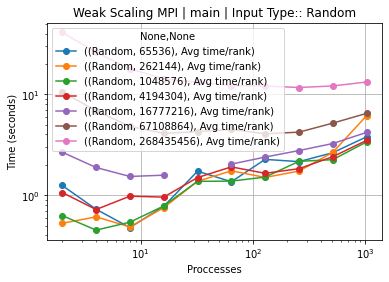

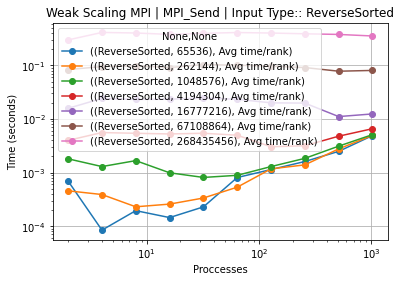

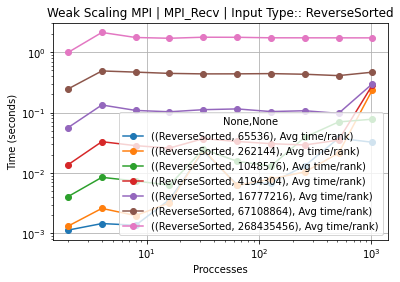

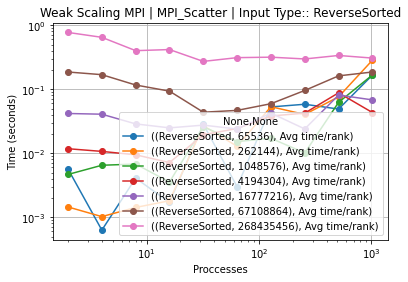

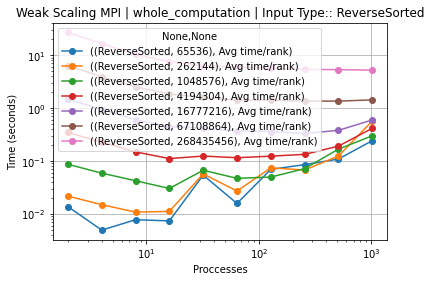

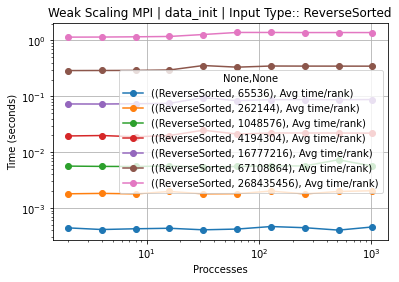

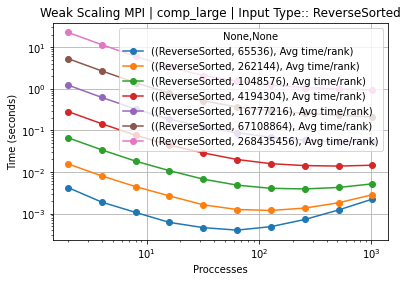

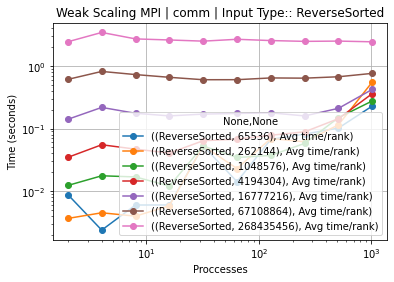

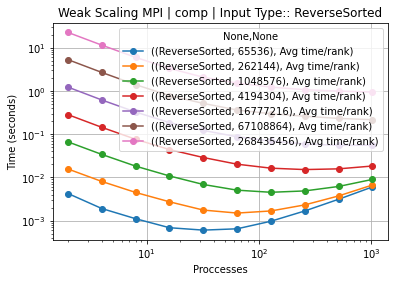

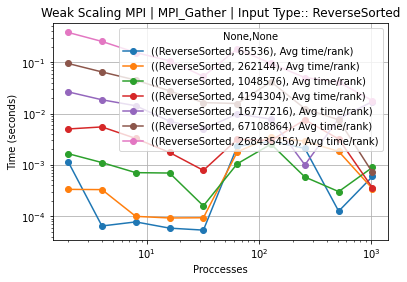

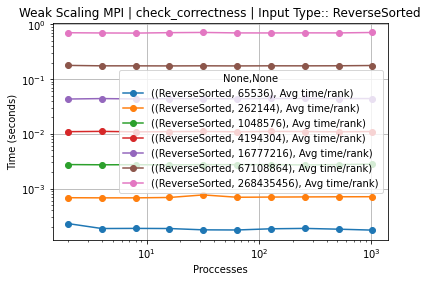

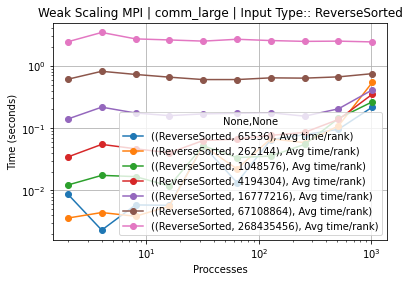

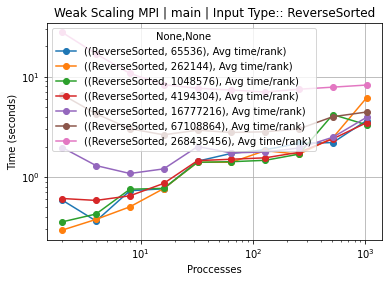

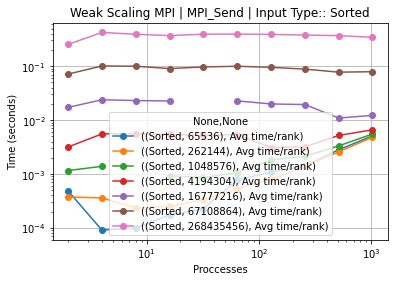

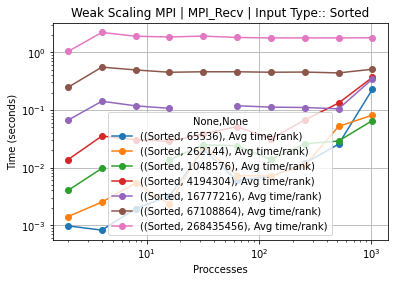

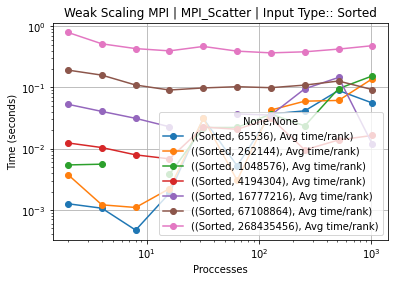

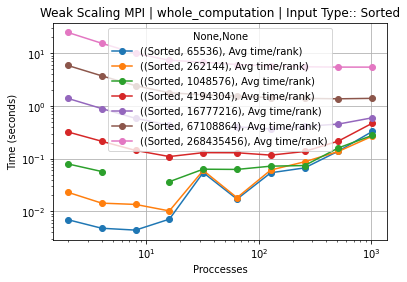

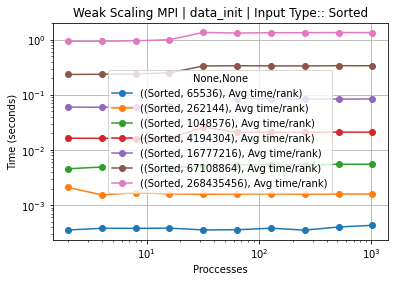

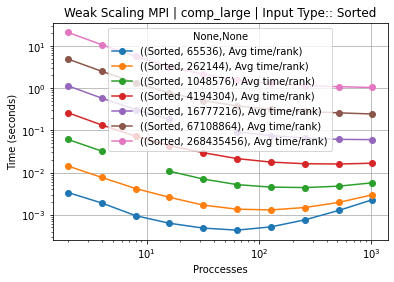

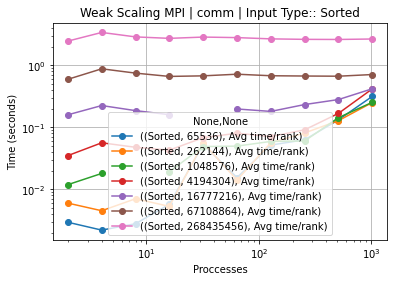

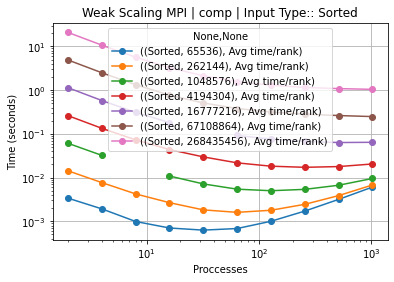

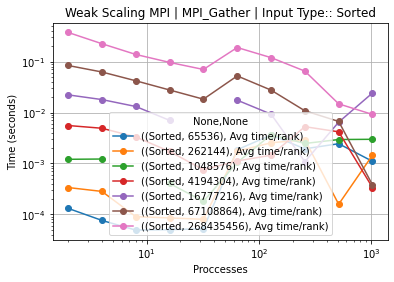

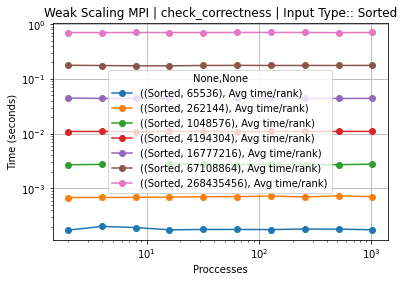

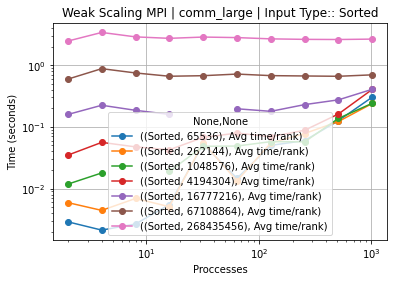

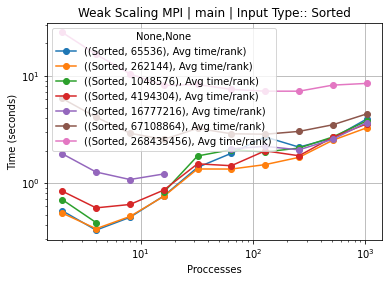

In [20]:
#Plotting Weak Scaling
for intype in inputtypes:
    cols = [(inputsize, "Avg time/rank") for inputsize in ctk.dataframe.columns.get_level_values(0) if inputsize[0] == intype]
    test = ctk.dataframe[cols]
    for name in function_names:
        plot_pandas(
            df=test.loc[name],
            title=f"Weak Scaling MPI | {name} | Input Type:: {intype}",
            xlabel="Proccesses",
            ylabel="Time (seconds)",
            loglog=True
        )